#Proyecto de Machine Learning -  Rendimiento de Estudiantes

###Integrantes:
- Angel Steven Martinez Chamba
- Henrry Manuel Jimebez Calva

###Flujo de Trabajo:

1. Datos y definición del problema
2. Colección de datos
3. Pre procesamiento de datos
4. Evaluación
5. Clasificación

##1. Datos y definición del problema
---
- ¿Cuál es el problema que quieres resolver?

Con el aprendizaje automático, los algoritmos de regresión, podemos usar un conjunto de datos de estudiantes para predecir las calificaciones de los estudiantes en sus exámenes. Esta es una aplicación interesante ya que les permite a los maestros predecir las calificaciones de los estudiantes antes de los exámenes y encontrar formas de ayudar a los estudiantes que no se espera que se desempeñen tan bien. Este artículo proporciona una explicación detallada de cómo usar python para llevar a cabo esta tarea de predicción de aprendizaje automático.

- Preguntas:
1. Influencia del enamoramiento
2. Consumo de alcohol
3. Nivel de educación de los padres
4. Frecuencia de salida con amigos
5. Deseo de educación superior
6. Estudiantes Rurales vs Estudiantes Urbanos

- ¿Por qué es importante?

Es importante porque se puede predecir el desempeño académico apartir de partir de indicadores de desempeño, rasgos que enfocan la atención en aspectos

####Dataset:
Este estudio considera los datos recopilados durante el año escolar 2005-2006 de dos escuelas públicas, de la región de Alentemol de Portugal. La base de datos se construyó a partir de dos fuentes: informes escolares y cuestionarios, relacionados con varias variables demográficas (p. ej., educación de la madre, ingresos familiares), sociales/emocionales (p. ej., consumo de alcohol) y relacionadas con la escuela (p. ej., número de fracasos en clases anteriores) que son se espera que afecte el desempeño de los estudiantes. Los conjuntos de datos utilizados para este proyecto están disponibles públicamente en Kaggle y se pueden descargar con estas direcciones URL:
- https://www.kaggle.com/balavashan/students-performance-dataset


##2. Colección de datos

In [ ]:
import pandas as pd       #Para el manejo y analisis de estructuras de datos
import matplotlib.pyplot as plt #Para crear graficos en dos dimensiones
%matplotlib inline    
import numpy as np        #Para crear vectores y matrices
import seaborn as sns      #Para generar graficos
sns.set_style('whitegrid')
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


###Colaboración con google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Cargar conjuntos de datos para dos materias, Matemáticas y Portugués
mat = pd.read_csv("/content/drive/MyDrive/student/student-mat.csv", sep=';', quotechar='"')
por = pd.read_csv("/content/drive/MyDrive/student/student-por.csv", sep=';', quotechar='"')

### Presentacion de datos

In [ ]:
mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [ ]:
por.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


##3. Pre procesamiento de datos
- Limpieza de datos
- Completar valores faltantes
- Normalizar
- Eliminar valores atípicos
- Codificación
- Entre otros

*Data* Pre-processing:
Antes de que podamos aplicar nuestros algoritmos de regresión en nuestro conjunto de datos, primero debemos procesar previamente nuestro conjunto de datos para asegurarnos de que hemos manejado valores categóricos y vacíos.

En primer lugar, verificamos los valores vacíos en nuestro conjunto de datos usando la función isnull y sum como se muestra en el fragmento de código a continuación.

**Tipos de variables**


In [ ]:
#Unimos los conjuntos de datos
df = pd.concat([mat, por])

In [ ]:
#Cambiar el nombre de las etiquetas de las columnas
df.columns = ['school','sex','age','address','family_size','parents_status','mother_education','father_education',
           'mother_job','father_job','reason','guardian','commute_time','study_time','failures','school_support',
          'family_support','paid_classes','activities','nursery','desire_higher_edu','internet','romantic','family_quality',
          'free_time','go_out','weekday_alcohol_usage','weekend_alcohol_usage','health','absences','period1_score','period2_score','final_score']

In [ ]:
#Convertir calificación final a variable categórica #Bueno: 15 ~ 20 Regular: 10 ~ 14 Pobre: ​​0 ~ 9
df['final_grade'] = 'na'
df.loc[(df.final_score >= 15) & (df.final_score <= 20), 'final_grade'] = 'good' 
df.loc[(df.final_score >= 10) & (df.final_score <= 14), 'final_grade'] = 'fair' 
df.loc[(df.final_score >= 0) & (df.final_score <= 9), 'final_grade'] = 'poor' 
df.head(5)

,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,reason,guardian,commute_time,study_time,failures,school_support,family_support,paid_classes,activities,nursery,desire_higher_edu,internet,romantic,family_quality,free_time,go_out,weekday_alcohol_usage,weekend_alcohol_usage,health,absences,period1_score,period2_score,final_score,final_grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,poor
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,poor
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,fair
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,good
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,fair


####¡Echemos un vistazo a las variables!

In [ ]:
# buscar valores faltantes
df.isnull().any()

school                   False
sex                      False
age                      False
address                  False
family_size              False
parents_status           False
mother_education         False
father_education         False
mother_job               False
father_job               False
reason                   False
guardian                 False
commute_time             False
study_time               False
failures                 False
school_support           False
family_support           False
paid_classes             False
activities               False
nursery                  False
desire_higher_edu        False
internet                 False
romantic                 False
family_quality           False
free_time                False
go_out                   False
weekday_alcohol_usage    False
weekend_alcohol_usage    False
health                   False
absences                 False
period1_score            False
period2_score            False
final_sc

In [ ]:
#Tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 648
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   school                 1044 non-null   object
 1   sex                    1044 non-null   object
 2   age                    1044 non-null   int64 
 3   address                1044 non-null   object
 4   family_size            1044 non-null   object
 5   parents_status         1044 non-null   object
 6   mother_education       1044 non-null   int64 
 7   father_education       1044 non-null   int64 
 8   mother_job             1044 non-null   object
 9   father_job             1044 non-null   object
 10  reason                 1044 non-null   object
 11  guardian               1044 non-null   object
 12  commute_time           1044 non-null   int64 
 13  study_time             1044 non-null   int64 
 14  failures               1044 non-null   int64 
 15  school_support        

Como podemos observar no se encuentran valores perdidos en nuestro conjunto de datos seleccionado

##4. Evaluación


###4.1. Análisis exploratorio de datos

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


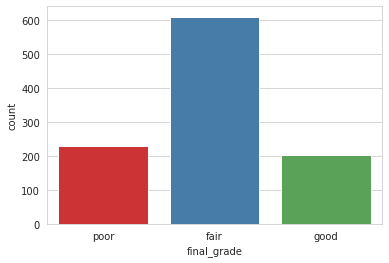

In [ ]:
# Gráfico de conteo de calificaciones finales
sns.countplot(df.final_grade, order=["poor","fair","good"], palette='Set1')

###4.2 Mapa de calor de correlación

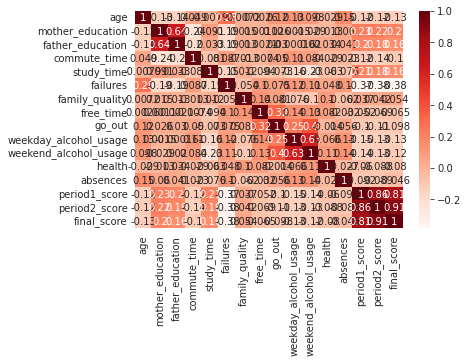

In [ ]:
# correlación entre variables a través de un mapa de calor de correlación
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="Reds")

###4.3 Calificación final por estado romántico

In [ ]:
# romantic status
perc = (lambda col: col/col.sum())
index = ['poor','fair','good']
romance_tab1 = pd.crosstab(index=df.final_grade, columns=df.romantic)
romance_tab = np.log(romance_tab1)
romance_perc = romance_tab.apply(perc).reindex(index)

<Figure size 432x288 with 0 Axes>

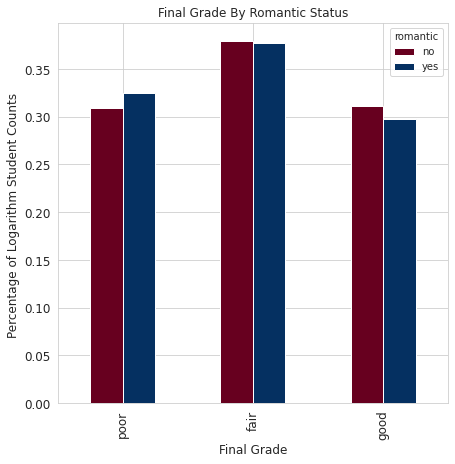

In [ ]:
plt.figure()
romance_perc.plot.bar(colormap="RdBu", fontsize=12, figsize=(7,7))
plt.title('Final Grade By Romantic Status', fontsize=12)
plt.ylabel('Percentage of Logarithm Student Counts ', fontsize=12)
plt.xlabel('Final Grade', fontsize=12)
plt.show()

En el analisis exploratorio de datos podemos observar que el estado emocional en este caso el enamoramiento, influye significativamente en la nota final de los estudiantes.

###4.4 Calificación final por consumo de alcohol

In [ ]:
# consumo de alcohol fin de semana
alc_tab1 = pd.crosstab(index=df.final_grade, columns=df.weekend_alcohol_usage)
alc_tab = np.log(alc_tab1)
alc_perc = alc_tab.apply(perc).reindex(index)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


Text(0.5, 0, 'Level of Alcohol Consumption')

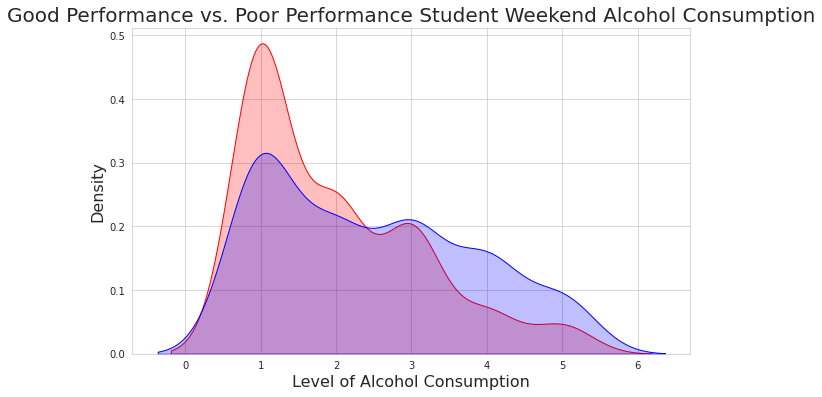

In [ ]:
# crear un buen dataframe de estudiante
good = df.loc[df.final_grade == 'good']
good['good_alcohol_usage']=good.weekend_alcohol_usage
good.reset_index(drop=False, inplace = True)
# crear marco de datos de estudiante pobre
poor = df.loc[df.final_grade == 'poor']
poor['poor_alcohol_usage']=poor.weekend_alcohol_usage
poor.reset_index(drop=False, inplace = True)

plt.figure(figsize=(10,6))
p1=sns.kdeplot(good['good_alcohol_usage'], shade=True, color="r")
p1=sns.kdeplot(poor['poor_alcohol_usage'], shade=True, color="b")
plt.title('Good Performance vs. Poor Performance Student Weekend Alcohol Consumption', fontsize=20)
plt.ylabel('Density', fontsize=16)
plt.xlabel('Level of Alcohol Consumption', fontsize=16)

Text(0.5, 0, 'Final Grade')

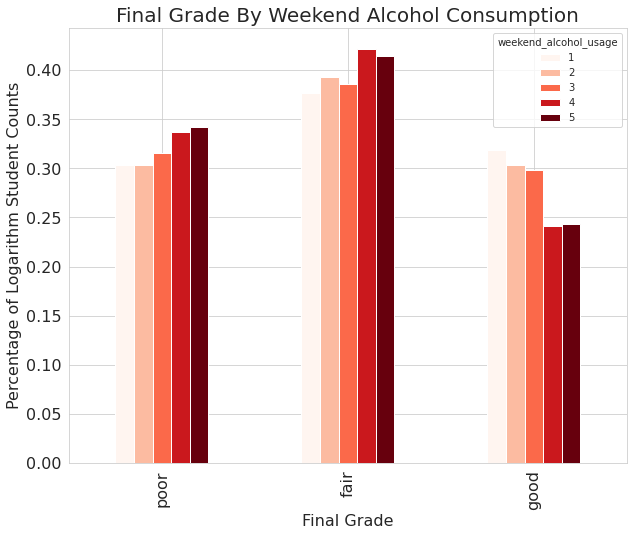

In [ ]:
alc_perc.plot.bar(colormap="Reds", figsize=(10,8), fontsize=16)
plt.title('Final Grade By Weekend Alcohol Consumption', fontsize=20)
plt.ylabel('Percentage of Logarithm Student Counts', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)

Podemos observar en el graficos, el consumo de alcohol durante el fin de semana es sigfinicativo en la influencia directa con la nota final del estudiante.

In [ ]:
# chi-square test result -- significant!
import statsmodels.api as sm
alc_table = sm.stats.Table(alc_tab1)
alc_rslt = alc_table.test_nominal_association()
alc_rslt.pvalue

0.007592294056368298

###4.5 Calificación final segun nivel educacion de los padres

In [ ]:
good['good_student_father_education'] = good.father_education
poor['poor_student_father_education'] = poor.father_education
good['good_student_mother_education'] = good.mother_education
poor['poor_student_mother_education'] = poor.mother_education

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

Text(0.5, 0, 'Nivel de educación del padre')

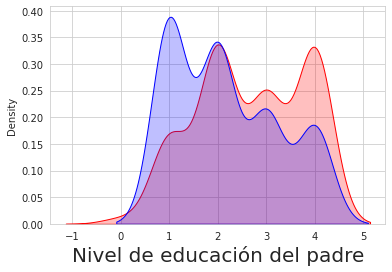

In [ ]:
# ver la diferencia entre el nivel de educación paterna de los buenos y los malos (numérico: de 1-muy bajo a 5-muy alto)
plt.figure(figsize=(6,4))
p2=sns.kdeplot(good['good_student_father_education'], shade=True, color="r")
p2=sns.kdeplot(poor['poor_student_father_education'], shade=True, color="b")
plt.xlabel('Nivel de educación del padre', fontsize=20)

Text(0.5, 0, 'Nivel de educación de la madre')

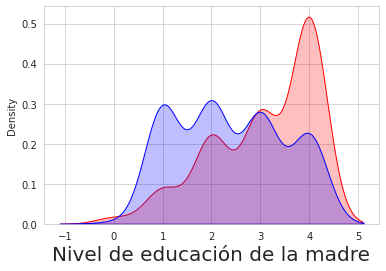

In [ ]:
# ver la diferencia entre el nivel de educación materna de los buenos y los malos resultados (numérico: de 1-muy bajo a 5-muy alto)
plt.figure(figsize=(6,4))
p3=sns.kdeplot(good['good_student_mother_education'], shade=True, color="r")
p3=sns.kdeplot(poor['poor_student_mother_education'], shade=True, color="b")
plt.xlabel('Nivel de educación de la madre', fontsize=20)

###El método OLS indica que el nivel educativo de los padres tiene una correlación positiva con la puntuación final de los alumnos. Comparativamente, el nivel educativo de la madre tiene mayor influencia que el del padre.

In [ ]:
# utilizar OLS para ver los coeficientes
X_edu = df[['mother_education','father_education']]
y_edu = df.final_score
edu = sm.OLS(y_edu, X_edu)
results_edu = edu.fit()
results_edu.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            final_score   R-squared (uncentered):                   0.814
Model:                            OLS   Adj. R-squared (uncentered):              0.814
Method:                 Least Squares   F-statistic:                              2287.
Date:                Wed, 16 Feb 2022   Prob (F-statistic):                        0.00
Time:                        21:32:56   Log-Likelihood:                         -3194.8
No. Observations:                1044   AIC:                                      6394.
Df Residuals:                    1042   BIC:                                      6403.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
mother_education     2.4078      0.166     14.527      0.000       2.083       2.733
father_education     1.5746      0.179      8.806      0.000       1.224       1.926
==============================================================================
Omnibus:                       35.858   Durbin-Watson:                   1.631
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.773
Skew:                          -0.427   Prob(JB):                     2.31e-09
Kurtosis:                       3.430   Cond. No.                         5.72
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###4.6 Calificación final según la frecuencia de las salidas
Vea cómo la frecuencia de las salidas con amigos influye en el rendimiento final de los estudiantes

Text(0.5, 0, 'Frequency of Going Out')

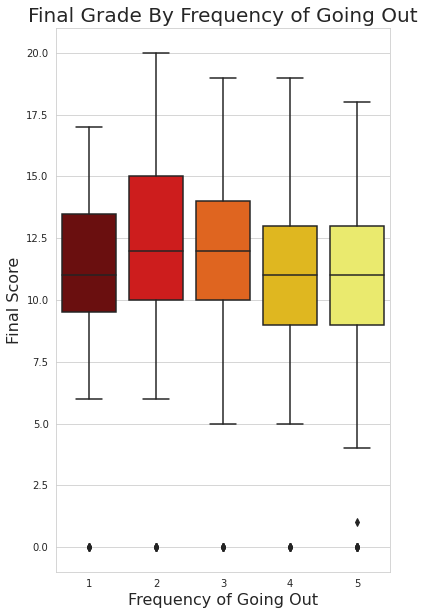

In [ ]:
# going out with friends (numeric: from 1 - very low to 5 - very high)
plt.figure(figsize=(6,10))
sns.boxplot(x='go_out', y='final_score', data=df, palette='hot')
plt.title('Final Grade By Frequency of Going Out', fontsize=20)
plt.ylabel('Final Score', fontsize=16)
plt.xlabel('Frequency of Going Out', fontsize=16)

Text(0.5, 0, 'Final Grade')

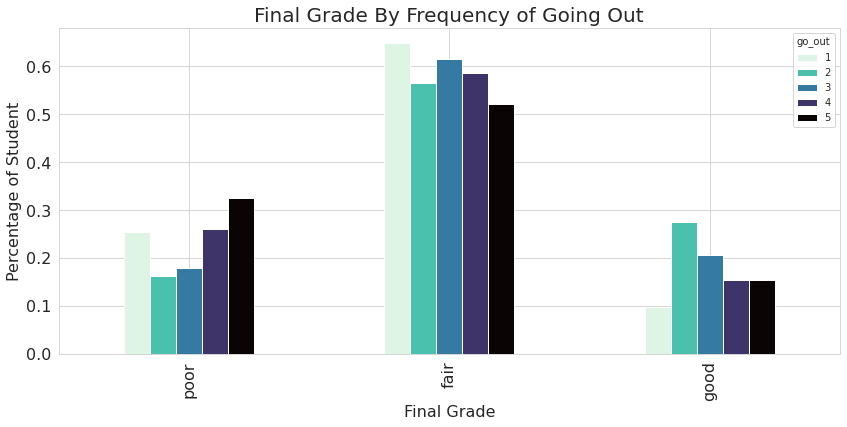

In [ ]:
out_tab = pd.crosstab(index=df.final_grade, columns=df.go_out)
out_perc = out_tab.apply(perc).reindex(index)
out_perc.plot.bar(colormap="mako_r", fontsize=16, figsize=(14,6))
plt.title('Final Grade By Frequency of Going Out', fontsize=20)
plt.ylabel('Percentage of Student', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)

####Prueba de hipótesis confirmada, la frecuencia de salir con amigos tiene una correlación significativa con el rendimiento final de los estudiantes

In [ ]:
# chi-square test result -- significant!
out_table = sm.stats.Table(out_tab)
out_rslt = out_table.test_nominal_association()
out_rslt.pvalue

4.365198328282194e-05

###4.7 Calificación final según el deseo de ir a la universidad
ver cómo influye el deseo de ir a la universidad en el rendimiento final de los estudiantes

Text(0.5, 0, 'Age')

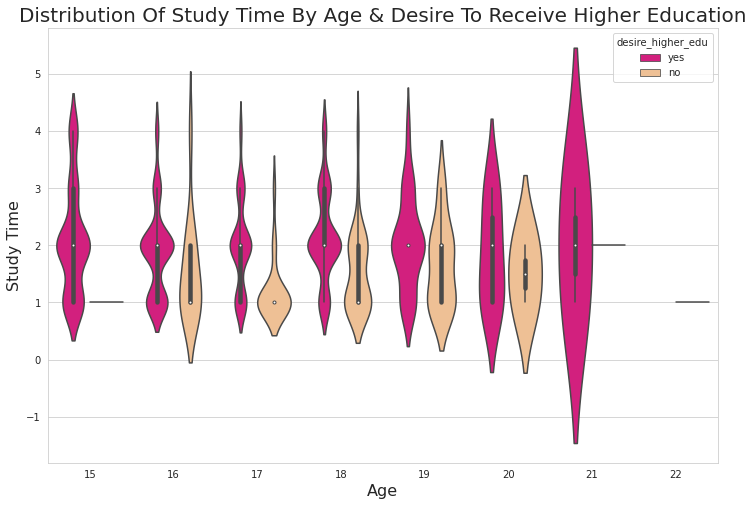

In [ ]:
# Desire for higher education and study time by age 
plt.figure(figsize=(12,8))
sns.violinplot(x='age', y='study_time', hue='desire_higher_edu', data=df, palette="Accent_r", ylim=(1,6))
plt.title('Distribution Of Study Time By Age & Desire To Receive Higher Education', fontsize=20)
plt.ylabel('Study Time', fontsize=16)
plt.xlabel('Age', fontsize=16)

In [ ]:
higher_tab = pd.crosstab(index=df.final_grade, columns=df.desire_higher_edu)
higher_perc = higher_tab.apply(perc).reindex(index)

Text(0, 0.5, 'Percentage of Student')

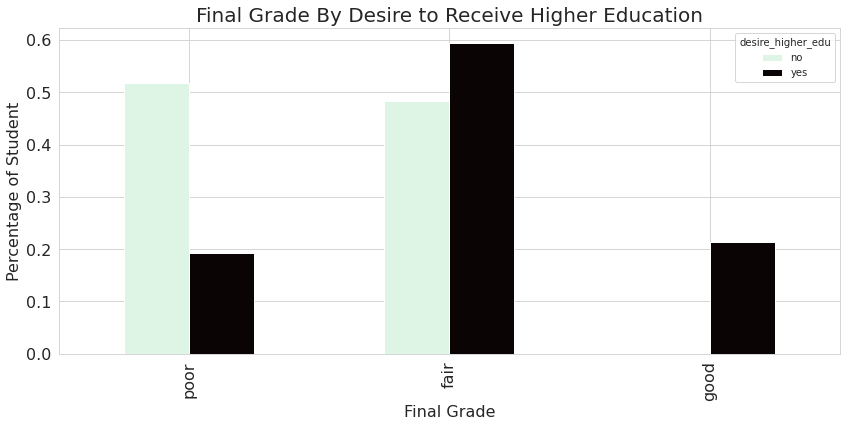

In [ ]:
higher_perc.plot.bar(colormap="mako_r", figsize=(14,6), fontsize=16)
plt.title('Final Grade By Desire to Receive Higher Education', fontsize=20)
plt.xlabel('Final Grade', fontsize=16)
plt.ylabel('Percentage of Student', fontsize=16)

####La prueba de hipótesis confirmó que el deseo de ir a la universidad tiene una correlación significativa con el rendimiento final de los estudiantes.

In [ ]:
# chi-square test result -- significant!
import statsmodels.api as sm
higher_table = sm.stats.Table(higher_tab)
higher_rslt = higher_table.test_nominal_association()
higher_rslt.pvalue

2.2470914018413168e-13

###4.8 Calificación final por área de vivienda
- Ver cómo la diferencia de rendimiento final entre los estudiantes que viven en la ciudad y los que viven en las zonas rurales

In [ ]:
# living area: urban vs. rural
df.address = df.address.map({'U':'Urban', 'R':'Rural'})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


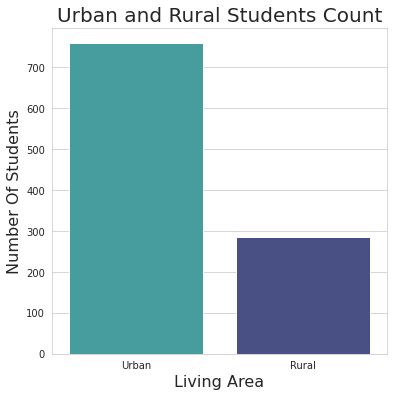

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(df.address, palette='mako_r')
plt.title('Urban and Rural Students Count', fontsize=20)
plt.xlabel('Living Area', fontsize=16)
plt.ylabel('Number Of Students', fontsize=16)
plt.show()

In [ ]:
ad_tab1 = pd.crosstab(index=df.final_grade, columns=df.address)
ad_tab = np.log(ad_tab1)
ad_perc = ad_tab.apply(perc).reindex(index)

Text(0.5, 0, 'Final Grade')

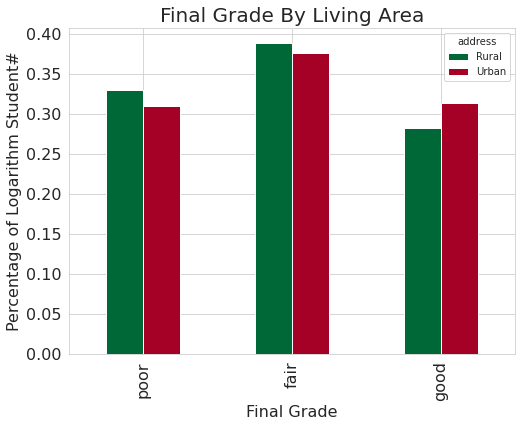

In [ ]:
ad_perc.plot.bar(colormap="RdYlGn_r", fontsize=16, figsize=(8,6))
plt.title('Final Grade By Living Area', fontsize=20)
plt.ylabel('Percentage of Logarithm Student#', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)

La prueba de hipótesis confirmó que la frecuencia de salir con amigos tiene una correlación significativa con el rendimiento final de los estudiantes.

In [ ]:
# chi-square test result -- significant!
ad_table = sm.stats.Table(ad_tab1)
ad_rslt = ad_table.test_nominal_association()
ad_rslt.pvalue

0.007608910517873602

In [ ]:
# explore other variables via OLS
dfl = df.copy()
X_ols = dfl.drop(['period1_score', 'period2_score', 'final_score','final_grade', 'failures','study_time','absences'], axis=1)
X_ols = pd.get_dummies(X_ols)

In [ ]:
mod = sm.OLS(df.final_score, X_ols)
mod = mod.fit()

##5. Clasificación
Use la información de los estudiantes para predecir su calificación final

###5.1 Preparar conjunto de datos para el modelado

In [ ]:
# create dataframe dfd for classification
dfd = df.copy()
dfd = dfd.drop(['final_score'], axis=1)
dfd.head(10)

,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,reason,guardian,commute_time,study_time,failures,school_support,family_support,paid_classes,activities,nursery,desire_higher_edu,internet,romantic,family_quality,free_time,go_out,weekday_alcohol_usage,weekend_alcohol_usage,health,absences,period1_score,period2_score,final_grade
0,GP,F,18,Urban,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,poor
1,GP,F,17,Urban,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,poor
2,GP,F,15,Urban,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,fair
3,GP,F,15,Urban,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,good
4,GP,F,16,Urban,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,fair
5,GP,M,16,Urban,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,15,good
6,GP,M,16,Urban,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,12,12,fair
7,GP,F,17,Urban,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,6,6,5,poor
8,GP,M,15,Urban,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,1,1,0,16,18,good
9,GP,M,15,Urban,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,5,1,1,1,5,0,14,15,good


In [ ]:
# label encode final_grade
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
dfd.final_grade = le.fit_transform(dfd.final_grade)
dfd

,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,reason,guardian,commute_time,study_time,failures,school_support,family_support,paid_classes,activities,nursery,desire_higher_edu,internet,romantic,family_quality,free_time,go_out,weekday_alcohol_usage,weekend_alcohol_usage,health,absences,period1_score,period2_score,final_grade
0,GP,F,18,Urban,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,2
1,GP,F,17,Urban,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,2
2,GP,F,15,Urban,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,0
3,GP,F,15,Urban,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,1
4,GP,F,16,Urban,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,Rural,GT3,T,2,3,services,other,course,mother,1,3,1,no,no,no,yes,no,yes,yes,no,5,4,2,1,2,5,4,10,11,0
645,MS,F,18,Urban,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,3,4,1,1,1,4,15,15,1
646,MS,F,18,Urban,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,6,11,12,2
647,MS,M,17,Urban,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,6,10,10,0


In [ ]:
# dataset train_test_split
from sklearn.model_selection import train_test_split
X = dfd.drop('final_grade', axis=1)
y = dfd.final_grade
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [ ]:
# get dummy varibles 
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [ ]:
# see total number of features
len(list(X_train))

58

### 5.2 Clasificación por árbol de decisión

In [ ]:
# find the optimal of minimum samples leaf
from sklearn.tree import DecisionTreeClassifier
msl=[]
for i in range(1,58):
    tree = DecisionTreeClassifier(min_samples_leaf=i)
    t= tree.fit(X_train, y_train)
    ts=t.score(X_test, y_test)
    msl.append(ts)
msl = pd.Series(msl)
msl.where(msl==msl.max()).dropna()

11    0.875796
dtype: float64

In [ ]:
# final model
tree = DecisionTreeClassifier(min_samples_leaf=17)
t= tree.fit(X_train, y_train)
print("Decisioin Tree Model Score" , ":" , t.score(X_train, y_train) , "," , 
      "Cross Validation Score" ,":" , t.score(X_test, y_test))

Decisioin Tree Model Score : 0.8958904109589041 , Cross Validation Score : 0.8598726114649682


### 5.3 Clasificación por Random Forest 

In [ ]:
# find a good # of estimators
from sklearn.ensemble import RandomForestClassifier
ne=[]
for i in range(1,58):
    forest = RandomForestClassifier()
    f = forest.fit(X_train, y_train)
    fs = f.score(X_test, y_test)
    ne.append(fs)
ne = pd.Series(ne)
ne.where(ne==ne.max()).dropna()

8     0.888535
17    0.888535
dtype: float64

In [ ]:
# find a good # of min_samples_leaf
from sklearn.ensemble import RandomForestClassifier
ne=[]
for i in range(1,58):
    forest = RandomForestClassifier(n_estimators=36, min_samples_leaf=i)
    f = forest.fit(X_train, y_train)
    fs = f.score(X_test, y_test)
    ne.append(fs)
ne = pd.Series(ne)
ne.where(ne==ne.max()).dropna()

2    0.888535
dtype: float64

In [ ]:
# final model
forest = RandomForestClassifier(n_estimators=36, min_samples_leaf=2)
f = forest.fit(X_train, y_train)
print("Random Forest Model Score" , ":" , f.score(X_train, y_train) , "," ,
      "Cross Validation Score" ,":" , f.score(X_test, y_test))

Random Forest Model Score : 0.9794520547945206 , Cross Validation Score : 0.8821656050955414


###5.4 Clasificación por Support Vector

In [ ]:
from sklearn.svm import SVC
svc = SVC()
s= svc.fit(X_train, y_train)
print("SVC Model Score" , ":" , s.score(X_train, y_train) , "," ,
      "Cross Validation Score" ,":" , s.score(X_test, y_test))

SVC Model Score : 0.8780821917808219 , Cross Validation Score : 0.8853503184713376


###5.5 Regresión logística

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class='multinomial', solver='newton-cg', fit_intercept=True)

In [ ]:
# find optimal # of features to use in the model
from sklearn.feature_selection import SelectKBest, chi2
ks=[]
for i in range(1,58):
    sk = SelectKBest(chi2, k=i)
    x_new = sk.fit_transform(X_train,y_train)
    x_new_test=sk.fit_transform(X_test,y_test)
    l = lr.fit(x_new, y_train)
    ll = l.score(x_new_test, y_test)
    ks.append(ll)  
ks = pd.Series(ks)
ks = ks.reindex(list(range(1, 58)))

### 5.6 Clasificación de Ada Boost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=2)
af = ada.fit(X_train, y_train)
print("Ada Boost Model Score" , ":" , af.score(X_train, y_train) , "," ,
      "Cross Validation Score" ,":" , af.score(X_test, y_test))

Ada Boost Model Score : 0.7397260273972602 , Cross Validation Score : 0.7356687898089171


### 5.7 Clasificación de descenso de gradiente estocástico

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sf = sgd.fit(X_train, y_train)
print("Stochastic Gradient Descent Model Score" , ":" , sf.score(X_train, y_train) , "," ,
      "Cross Validation Score" ,":" , sf.score(X_test, y_test))

Stochastic Gradient Descent Model Score : 0.7712328767123288 , Cross Validation Score : 0.7356687898089171


In [ ]:
# Multiple Liner Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
#predicting the test set result
y_pred = regressor.predict(X_test)
y_pred

array([ 5.40756226e-01,  4.52774048e-01,  3.75717163e-01,  3.50967407e-01,
        1.79890442e+00,  6.71371460e-01,  8.07510376e-01,  9.84756470e-01,
        4.35409546e-01,  6.54373169e-01,  9.32388306e-01,  5.75454712e-01,
        9.23477173e-01,  5.22476196e-01,  5.34530640e-01,  1.44912720e-01,
        1.19557190e+00,  1.76589966e-01,  5.43594360e-01,  8.53652954e-01,
        9.09500122e-01,  1.83517456e-01,  3.32107544e-01,  7.57369995e-01,
        3.03115845e-01,  9.35440063e-01,  3.93173218e-01,  6.33682251e-01,
        4.83779907e-01, -1.05270386e-01,  3.16482544e-01,  4.75143433e-01,
        7.75650024e-01, -2.21908569e-01,  5.40451050e-01,  1.34989929e+00,
        3.87954712e-01,  2.97561646e-01,  7.44171143e-02,  7.73727417e-01,
        1.23213196e+00,  6.41860962e-01,  1.61575317e-01,  1.19456482e+00,
        7.28073120e-01,  5.24276733e-01,  2.63076782e-01,  1.54159546e-01,
        8.45504761e-01,  6.47872925e-01,  4.63272095e-01,  4.32754517e-01,
        3.96774292e-01,  

In [ ]:
X_test

,age,mother_education,father_education,commute_time,study_time,failures,family_quality,free_time,go_out,weekday_alcohol_usage,weekend_alcohol_usage,health,absences,period1_score,period2_score,school_GP,school_MS,sex_F,sex_M,address_Rural,address_Urban,family_size_GT3,family_size_LE3,parents_status_A,parents_status_T,mother_job_at_home,mother_job_health,mother_job_other,mother_job_services,mother_job_teacher,father_job_at_home,father_job_health,father_job_other,father_job_services,father_job_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,school_support_no,school_support_yes,family_support_no,family_support_yes,paid_classes_no,paid_classes_yes,activities_no,activities_yes,nursery_no,nursery_yes,desire_higher_edu_no,desire_higher_edu_yes,internet_no,internet_yes,romantic_no,romantic_yes
558,17,2,2,2,1,0,5,5,5,3,5,5,0,8,13,0,1,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,1,0,0,1
5,16,4,3,1,2,0,5,4,2,1,2,5,10,15,15,1,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,1,0
254,17,2,1,1,1,0,4,4,2,2,4,5,0,8,12,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0
121,15,2,2,1,4,0,5,5,4,1,2,5,6,16,14,1,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,1,0
18,17,3,2,1,1,3,5,5,5,2,4,5,16,6,5,1,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,17,1,2,2,2,0,3,2,2,1,2,3,0,12,11,0,1,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0
170,16,3,4,3,1,2,3,4,5,2,4,2,0,6,5,1,0,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,1,1,0
570,16,2,2,2,1,0,5,4,3,2,4,4,6,7,8,0,1,0,1,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1
122,16,2,4,2,2,0,4,2,2,1,2,5,2,13,13,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


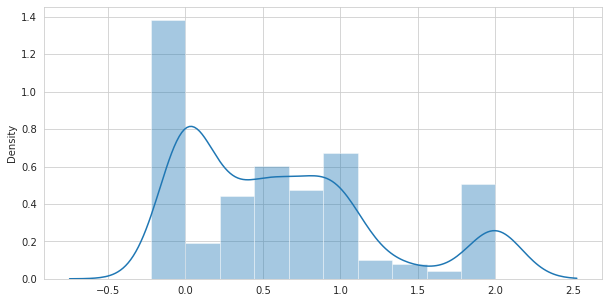

In [ ]:
# visualizing residuals
fig = plt.figure(figsize=(10,5))
residuals = (y_test, y_pred)
sns.distplot(residuals)

In [ ]:
#compare actual output values with predicted values
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(10)
df1

,Actual,Predicted
558,0,0.540756
5,1,0.452774
254,0,0.375717
121,1,0.350967
18,2,1.798904
445,2,0.671371
515,0,0.807510
279,0,0.984756
309,0,0.435410
380,0,0.654373


##Conclusiones
###Es probable que el mejor alumno de la clase del instituto tenga este perfil
1. No está en una relación romántica
2. No consume alcohol
3. Vive en una zona urbana
4. No sale con sus amigos con frecuencia
5. Tiene un fuerte deseo de recibir educación superior
6. Ambos padres han recibido educación superior

In [ ]:
import pickle

In [ ]:
Pkl_Filename = "ml_model_regression.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(regressor, file)